In [2]:
import pandas as pd

#try :
df = pd.read_csv('../data/BDFoodSent-334k.csv')
print(df.iloc[:5, 3:5])

                                                text  isAnonymous
0                              too much small amount        False
1                               very small in amount        False
2  food average but their desert booter halwa and...        False
3                                    fresh and tasty        False
4                      everything i ordered was good        False


In [3]:
print(df.shape)
print(df.columns)

(334119, 19)
Index(['uuid', 'createdAt', 'updatedAt', 'text', 'isAnonymous', 'reviewerName',
       'reviewerId', 'ratings_overall', 'labels', 'ratings', 'type',
       'likeCount', 'name', 'city', 'primary_cuisine', 'cuisines',
       'review_number', 'restaurant_overall_rating', 'vertical_type_ids'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334119 entries, 0 to 334118
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uuid                       334119 non-null  object 
 1   createdAt                  334119 non-null  object 
 2   updatedAt                  334119 non-null  object 
 3   text                       334119 non-null  object 
 4   isAnonymous                334119 non-null  bool   
 5   reviewerName               334119 non-null  object 
 6   reviewerId                 334119 non-null  object 
 7   ratings_overall            334119 non-null  int64  
 8   labels                     334119 non-null  int64  
 9   ratings                    334119 non-null  object 
 10  type                       334119 non-null  object 
 11  likeCount                  334119 non-null  int64  
 12  name                       334119 non-null  object 
 13  city                       33

In [5]:
print(df.isnull().sum())

uuid                         0
createdAt                    0
updatedAt                    0
text                         0
isAnonymous                  0
reviewerName                 0
reviewerId                   0
ratings_overall              0
labels                       0
ratings                      0
type                         0
likeCount                    0
name                         0
city                         0
primary_cuisine              0
cuisines                     0
review_number                0
restaurant_overall_rating    0
vertical_type_ids            0
dtype: int64


In [6]:
df['text'] = df['text'].str.lower()
text_lower = df['text'].str.lower()
print(text_lower.head(5))

0                                too much small amount
1                                 very small in amount
2    food average but their desert booter halwa and...
3                                      fresh and tasty
4                        everything i ordered was good
Name: text, dtype: object


In [7]:
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
text_sentence = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
print(text_sentence.head(10))

0                                too much small amount
1                                 very small in amount
2    food average but their desert booter halwa and...
3                                      fresh and tasty
4                        everything i ordered was good
5    kalo jira vhorta balu vhorta not recommended b...
6    quantity of dal should be little more otherwis...
7    beef was too poor in size quantity aganist pri...
8    chicken was not up to the mark and lotpoti was...
9                     lot of sand in kali jeers bortha
Name: text, dtype: object


In [8]:
text_series = df['text']

Word_Count = text_series.str.split(' ').str.len()

In [9]:
new_df = pd.DataFrame({
    'Original_Text': text_series,
    'Word_Count': Word_Count
})
print(new_df[:5])

                                       Original_Text  Word_Count
0                              too much small amount           4
1                               very small in amount           4
2  food average but their desert booter halwa and...          12
3                                    fresh and tasty           3
4                      everything i ordered was good           5


In [10]:
print(new_df['Word_Count'].describe())

count    334119.000000
mean         11.403045
std          10.048155
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max          73.000000
Name: Word_Count, dtype: float64


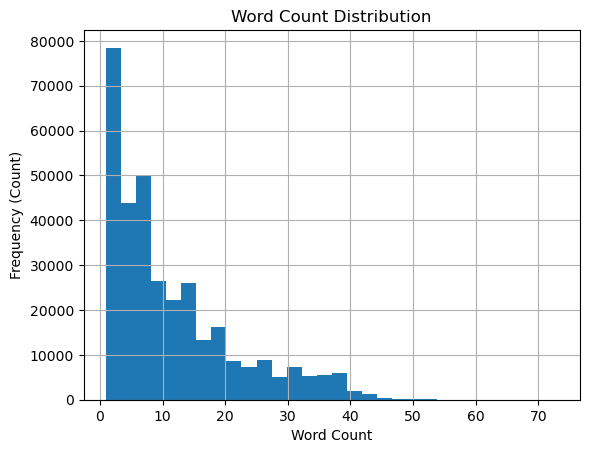

In [11]:
import matplotlib.pyplot as plt
new_df['Word_Count'].hist(bins=30) 
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency (Count)')
plt.show()

In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import words
from typing import Set

In [13]:
# --- 1. Initialization of Constants ---

# Ensure the NLTK words corpus is downloaded
try:
    # Use quiet=True to suppress standard NLTK download output
    nltk.download("words", quiet=True) 
except Exception:
    print("Warning: NLTK words corpus might not be available.")

# English word set for fast lookups (O(1) complexity)
ENGLISH_WORDS: Set[str] = set(words.words())

# Regex pattern to find sequences of alphabetic characters (words)
WORD_RE = re.compile(r"[A-Za-z]+")

In [15]:
# --- 2. Core Logic Functions ---

def english_ratio(text: str) -> float:
    """Calculates the ratio of standard English words to the total word count in the text."""
    
    # 1. Find all word tokens (sequences of letters) and convert to lowercase
    tokens = WORD_RE.findall(str(text).lower())
    
    # 2. Return 0.0 if no tokens are found to prevent ZeroDivisionError
    if not tokens:
        return 0.0
        
    # 3. Count how many tokens are present in the ENGLISH_WORDS set
    eng_count = sum(1 for t in tokens if t in ENGLISH_WORDS)
    
    # 4. Return the calculated ratio
    return eng_count / len(tokens)

def is_english_review(text: str, threshold: float = 0.75) -> bool:
    """
    Determines if a review is English based on the English word ratio and a given threshold.
    
    Args:
        text: The review text string.
        threshold: The minimum ratio required to classify the review as English (default 0.75).
        
    Returns:
        True if the ratio is >= threshold, False otherwise.
    """
    return english_ratio(text) >= threshold

In [17]:
# --- 3. Execution and Counting ---

# Assuming your DataFrame 'df' has been loaded:
# df = pd.read_csv('../data/BDFoodSent-334k.csv') 

# Define the threshold for classifying a review as English
# A higher value (e.g., 0.75 or 0.90) is usually better for strict classification.
ENGLISH_THRESHOLD = 0.75 

print(f"--- Using English word ratio >= {ENGLISH_THRESHOLD*100}% as the criterion for an English review ---")

# Apply the classification function to the 'review' column to get a boolean Series
is_english_series = df["text"].apply(lambda x: is_english_review(x, ENGLISH_THRESHOLD))

# Count the occurrences of True (English) and False (Non-English/Mixed)
count_results = is_english_series.value_counts()

--- Using English word ratio >= 75.0% as the criterion for an English review ---


In [27]:
# --- 4. Print Results ---

total_rows = len(df)
# Use .get() to safely retrieve counts, defaulting to 0 if a key is missing
english_count = count_results.get(True, 0)
non_english_count = count_results.get(False, 0)

print("\nReview Language Statistics:")
print("-" * 40)
print(f"| {'Is English':<10} | {'Count':<10} | {'Percentage':<10} |")
print("-" * 40)
# Format output for better readability (thousands separator for count, percentage for ratio)
print(f"| {'English':<10} | {english_count:<10,} | {english_count/total_rows:<10.2%} |")
print(f"| {'NonEnglish':<10} | {non_english_count:<10,} | {non_english_count/total_rows:<10.2%} |")
print("-" * 40)
print(f"| {'Total':<10} | {total_rows:<10,} | {'100.00%':<10} |")


Review Language Statistics:
----------------------------------------
| Is English | Count      | Percentage |
----------------------------------------
| English    | 267,591    | 80.09%     |
| NonEnglish | 66,528     | 19.91%     |
----------------------------------------
| Total      | 334,119    | 100.00%    |


In [29]:

# --- 1. Identify Unique Restaurants for Accurate Review Number Summation ---

# Step 1.1: Create a unique identifier (Restaurant Name + City)
df['restaurant_key'] = df['name'] + ' - ' + df['city']

# Step 1.2: Keep only one row per unique restaurant key.
# Use drop_duplicates to ensure each restaurant's review_number is counted only once.
# Keep only the essential columns: restaurant_key, city, and review_number
unique_restaurants_df = df.drop_duplicates(subset=['restaurant_key'], keep='first')[['restaurant_key', 'city', 'review_number']]


# --- 2. Group by City for Aggregation ---

city_analysis = unique_restaurants_df.groupby('city').agg(
    # Restaurant Count: Count the number of unique restaurant keys
    unique_restaurant_count=('restaurant_key', 'count'),
    
    # Total Potential Reviews: Sum the review_number for all unique restaurants in that city
    total_potential_reviews=('review_number', 'sum')
)

# --- 3. Add Sampled Review Count (from the original df) ---

# Count the number of reviews actually sampled in the original dataset per city
sampled_review_count = df.groupby('city').size().rename('sampled_review_count')

# Merge the sampled review count into the analysis result
city_analysis = city_analysis.merge(sampled_review_count, on='city', how='left')


# --- 4. Calculate Coverage and Finalize Results ---

# Calculate the data coverage ratio
city_analysis['coverage_ratio'] = (city_analysis['sampled_review_count'] / city_analysis['total_potential_reviews']) * 100

# Sort the results in descending order by potential reviews and select the final columns
city_analysis = city_analysis.sort_values(by='total_potential_reviews', ascending=False)
city_analysis = city_analysis[['unique_restaurant_count', 'total_potential_reviews', 'sampled_review_count', 'coverage_ratio']]


# --- 5. Print Results ---

# Print the analysis title in English
print("Potential Market Size Analysis by City (Top 10):")
print("-" * 70)
# Print the Markdown table format using floatfmt for formatting numbers
print(city_analysis.head(10).to_markdown(floatfmt=(",.0f", ",.0f", ",.0f", ".2f")))

Potential Market Size Analysis by City (Top 10):
----------------------------------------------------------------------
| city        |   unique_restaurant_count |   total_potential_reviews |   sampled_review_count |   coverage_ratio |
|:------------|--------------------------:|--------------------------:|-----------------------:|-----------------:|
| Dhaka       |                     4,511 |                 3,577,271 |              266091.00 |          7.43838 |
| Chittagong  |                       576 |                   419,391 |               38290.00 |          9.12991 |
| Sylhet      |                       242 |                   144,238 |               14821.00 |         10.2754  |
| Narayanganj |                       114 |                    64,823 |                6888.00 |         10.6259  |
| Savar       |                        75 |                    54,475 |                4830.00 |          8.86645 |
| Gazipur     |                        78 |                    27,99

In [32]:
import seaborn as sns

data = {
    'city': ['Dhaka', 'Chittagong', 'Sylhet', 'Narayanganj', 'Savar', 'Gazipur', 'Moulvibazar'],
    'unique_restaurant_count': [4511, 576, 242, 114, 75, 78, 1],
    'total_potential_reviews': [3577271, 419391, 144238, 64823, 54475, 27997, 16],
    'sampled_review_count': [266091, 38290, 14821, 6888, 4830, 3187, 12],
    'coverage_ratio': [7.43838, 9.12991, 10.2754, 10.6259, 8.86645, 11.3834, 75.0]
}
city_analysis = pd.DataFrame(data)

# Isolate Moulvibazar, as this outlier severely compresses the other parts of the chart.
# We proceed with a more detailed analysis on the main cities (those with > 100,000 potential reviews).
df_main = city_analysis[city_analysis['total_potential_reviews'] > 100000].copy()

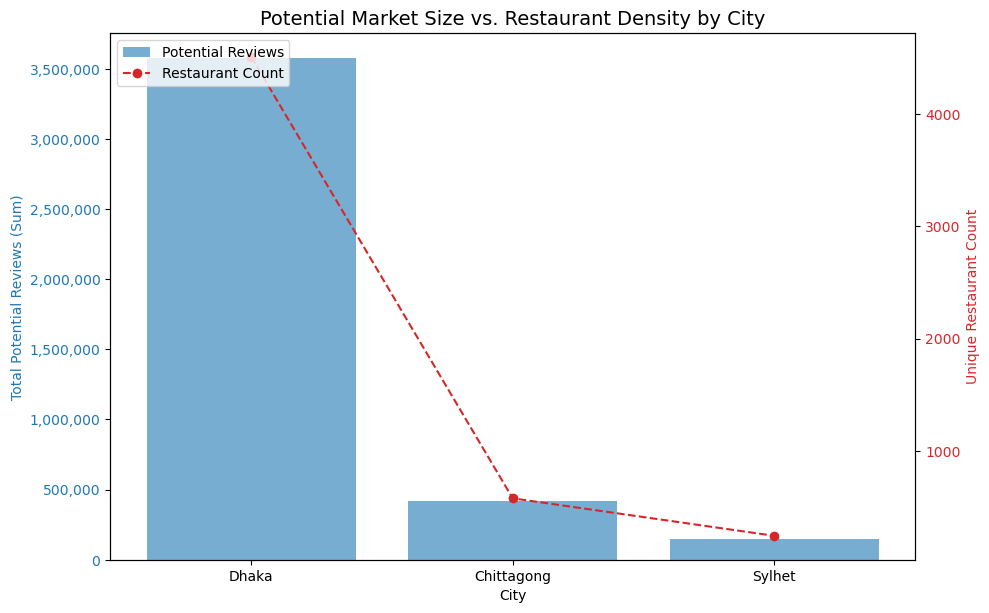

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Draw Primary Axis: Total Potential Reviews ---
color = 'tab:blue'
ax1.set_xlabel('City')
ax1.set_ylabel('Total Potential Reviews (Sum)', color=color)
ax1.bar(df_main['city'], df_main['total_potential_reviews'], color=color, alpha=0.6, label='Potential Reviews')
ax1.tick_params(axis='y', labelcolor=color)
# Format y-axis labels with comma separators
ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))
)

# --- Draw Secondary Axis: Unique Restaurant Count ---
ax2 = ax1.twinx()  # Create a secondary axes object that shares the x-axis
color = 'tab:red'
ax2.set_ylabel('Unique Restaurant Count', color=color)
ax2.plot(df_main['city'], df_main['unique_restaurant_count'], color=color, marker='o', linestyle='--', label='Restaurant Count')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
fig.tight_layout()
plt.title('Potential Market Size vs. Restaurant Density by City', fontsize=14)
# Merge legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

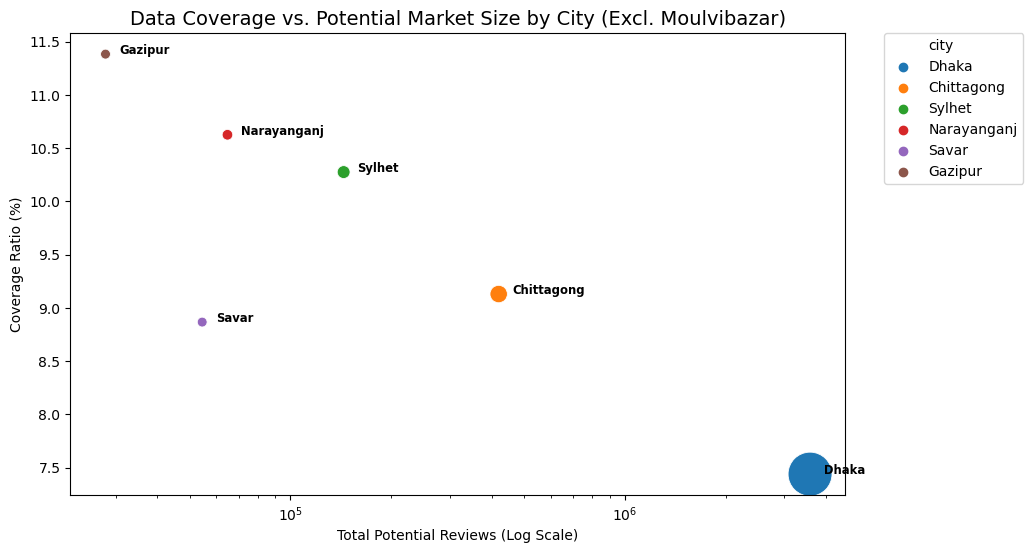

In [37]:
# Assuming df_plot is the DataFrame already filtered to exclude Moulvibazar

plt.figure(figsize=(10, 6))

# Use seaborn to draw the scatter plot
sns.scatterplot(
    data=df_plot,  
    x='total_potential_reviews',
    y='coverage_ratio',
    size='unique_restaurant_count',  # Still use restaurant count to determine marker size
    sizes=(50, 1000), 
    hue='city', 
    legend='full'  # Draw both color (hue) and size legends initially
)

# --- Manually Filter and Recreate Legend to Remove Size Legend ---

# Get the current axes object
ax = plt.gca()

# Get all current legend handles and labels (which include both city color and size)
handles, labels = ax.get_legend_handles_labels()

# Determine the index where the 'size' legend items begin.
# The size legend usually starts immediately after the 'hue' labels (cities).
# The first label is typically 'city' or the size variable name, followed by the city names.
# For simplicity, we assume the city labels are the primary group we want to keep.
# Let's count the number of unique cities (which corresponds to the number of color entries).
num_cities = len(df_plot['city'].unique()) 

# The first 'num_cities' entries are the color legend items (cities). 
# We filter the handles/labels list to only keep these.
city_handles = handles[:num_cities + 1] # Keep the title ('city') and all city entries
city_labels = labels[:num_cities + 1]

# Re-set the legend using only the filtered city (color) handles and labels
ax.legend(city_handles, 
          city_labels, 
          bbox_to_anchor=(1.05, 1), 
          loc=2, 
          borderaxespad=0., 
          )

# Set the X-axis to a logarithmic scale
plt.xscale('log')
plt.xlabel('Total Potential Reviews (Log Scale)')
plt.ylabel('Coverage Ratio (%)')
plt.title('Data Coverage vs. Potential Market Size by City (Excl. Moulvibazar)', fontsize=14)

# Add labels to each point (identical to previous code)
for line in range(0, df_plot.shape[0]):
    plt.text(df_plot['total_potential_reviews'].iloc[line] * 1.1, 
             df_plot['coverage_ratio'].iloc[line],
             df_plot['city'].iloc[line],
             horizontalalignment='left', 
             size='small', 
             color='black', 
             weight='semibold')

plt.show()

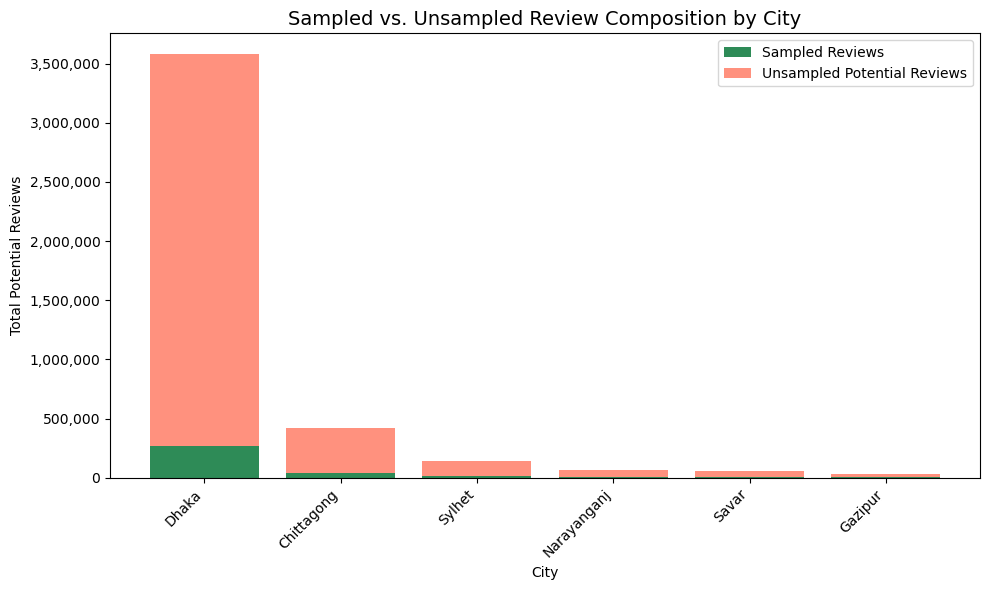

In [38]:
# Calculate the number of unsampled reviews
city_analysis['unsampled_reviews'] = city_analysis['total_potential_reviews'] - city_analysis['sampled_review_count']

# Filter out Moulvibazar (and other small outliers) to prevent it from compressing the chart's scale
df_stack = city_analysis[city_analysis['total_potential_reviews'] > 1000].sort_values('total_potential_reviews', ascending=False)

plt.figure(figsize=(10, 6))

# Draw the stacked bar chart
# Bottom layer: Sampled reviews count
p1 = plt.bar(df_stack['city'], df_stack['sampled_review_count'], color='seagreen', label='Sampled Reviews')

# Top layer: Unsampled reviews count (stacked on top of sampled_review_count)
p2 = plt.bar(df_stack['city'], df_stack['unsampled_reviews'], bottom=df_stack['sampled_review_count'], color='tomato', alpha=0.7, label='Unsampled Potential Reviews')

# Format y-axis labels with comma separators
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.ylabel('Total Potential Reviews')
plt.xlabel('City')
plt.title('Sampled vs. Unsampled Review Composition by City', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()